In [173]:
from osgeo import gdal 
from osgeo import ogr 
from osgeo import osr 
from osgeo import gdal_array 
import os
import numpy as np
from matplotlib import pyplot
import rasterio
from rasterio.plot import show, show_hist
import subprocess

In [174]:
path=r"C:\Users\JaSzw\OneDrive\Pulpit\Geoinfa\Pliki_lab_8" 
file="puszcza_bukowa_szmaragdowe.asc"
plik=os.path.join(path,file)
print(plik)

C:\Users\JaSzw\OneDrive\Pulpit\Geoinfa\Pliki_lab_8\puszcza_bukowa_szmaragdowe.asc


In [175]:
gdaldem = "gdaldem.exe slope"
src = "C:\\Users\JaSzw\OneDrive\Pulpit\Geoinfa\Pliki_lab_8\puszcza_bukowa_szmaragdowe.asc"
dst = "puszcza_bukowa_nach.tif"

subprocess.run(gdaldem + " -of Gtiff -b 1 -s 1.0 " + src + " " +  dst)
gdal.GetDriverByName('GTiff')
nmt=gdal.Open(dst)
dir(nmt)

['AddBand',
 'AdviseRead',
 'BeginAsyncReader',
 'BuildOverviews',
 'CommitTransaction',
 'CopyLayer',
 'CreateLayer',
 'CreateMaskBand',
 'DeleteLayer',
 'EndAsyncReader',
 'ExecuteSQL',
 'FlushCache',
 'GetDescription',
 'GetDriver',
 'GetFileList',
 'GetGCPCount',
 'GetGCPProjection',
 'GetGCPSpatialRef',
 'GetGCPs',
 'GetGeoTransform',
 'GetLayer',
 'GetLayerByIndex',
 'GetLayerByName',
 'GetLayerCount',
 'GetMetadata',
 'GetMetadataDomainList',
 'GetMetadataItem',
 'GetMetadata_Dict',
 'GetMetadata_List',
 'GetNextFeature',
 'GetProjection',
 'GetProjectionRef',
 'GetRasterBand',
 'GetSpatialRef',
 'GetStyleTable',
 'GetSubDatasets',
 'GetTiledVirtualMem',
 'GetTiledVirtualMemArray',
 'GetVirtualMem',
 'GetVirtualMemArray',
 'RasterCount',
 'RasterXSize',
 'RasterYSize',
 'ReadAsArray',
 'ReadRaster',
 'ReadRaster1',
 'ReleaseResultSet',
 'ResetReading',
 'RollbackTransaction',
 'SetDescription',
 'SetGCPs',
 'SetGeoTransform',
 'SetMetadata',
 'SetMetadataItem',
 'SetProjection',

In [176]:
band = nmt.GetRasterBand(1)
array=band.ReadAsArray()

In [177]:
array[np.where( array <= 5 )] = 1
array[np.where((5 < array) & (array <= 10)) ] = 2
array[np.where((10 < array) & (array <= 20)) ] = 3
array[np.where( array > 20 )] = 4

In [178]:
print(array)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 2. 1. ... 3. 3. 1.]
 [1. 2. 1. ... 4. 4. 1.]
 ...
 [1. 1. 1. ... 3. 3. 1.]
 [1. 1. 1. ... 3. 3. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [179]:
area_per_pixel=nmt.GetGeoTransform()
print(area_per_pixel)
for x in np.unique(array):
    tot_num_pixels = np.sum(array == x)
    area = tot_num_pixels * area_per_pixel[1]
    print (x, area/10000, 'ha')

(208859.5, 1.0, 0.0, 620948.5, 0.0, -1.0)
1.0 5.6147 ha
2.0 3.7006 ha
3.0 5.3001 ha
4.0 6.0142 ha


In [181]:
file2 = driver.Create( 'do_pokazania.tif', nmt.RasterXSize , nmt.RasterYSize , 1)
file2.GetRasterBand(1).WriteArray(array)

0

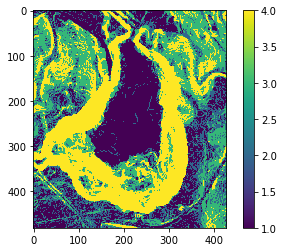

In [182]:
proj = nmt.GetProjection()
georef = nmt.GetGeoTransform()
file2.SetProjection(proj)
file2.SetGeoTransform(georef)
file2.FlushCache()
pyplot.imshow ( array, interpolation='nearest', vmin=1)
pyplot.colorbar()

In [183]:


outFileName = 'C:\\Users\JaSzw\OneDrive\Pulpit\Geoinfa\Pliki_lab_8\lab5_lidwin.tif'

srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)


band = nmt.GetRasterBand(1) 

array = band.ReadAsArray() 
[cols, rows] = array.shape 

driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(outFileName, rows, cols, 1, gdal.GDT_Float32)
outdata.SetGeoTransform(nmt.GetGeoTransform())
outdata.SetProjection(srs.ExportToWkt())
outdata.GetRasterBand(1).WriteArray(array)
outdata.GetRasterBand(1).SetNoDataValue(-9999)
outdata.FlushCache() 


In [184]:
import rasterio
from rasterio.features import shapes
do_konwersji="C:\\Users\JaSzw\OneDrive\Pulpit\Geoinfa\Pliki_lab_8\lab5_lidwin.tif"
mask = None
with rasterio.Env():
    with rasterio.open(do_konwersji) as file_r:
        image = file_r.read(1)
        rozm = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=file_r.transform)))
wynik= list(rozm)
gdf = gpd.GeoDataFrame.from_features(wynik)
gdf['teren'] = gdf.area / 10000
gdf.to_file("C:\\Users\JaSzw\OneDrive\Pulpit\Geoinfa\Pliki_lab_8\lab5_lidwin.gpkg", driver="GPKG")
gdf.head()

,geometry,raster_val,teren
0,"POLYGON ((208860.500 620947.500, 208860.500 62...",5.367639,0.0001
1,"POLYGON ((208861.500 620947.500, 208861.500 62...",3.125196,0.0001
2,"POLYGON ((208862.500 620947.500, 208862.500 62...",5.295449,0.0001
3,"POLYGON ((208863.500 620947.500, 208863.500 62...",3.731256,0.0001
4,"POLYGON ((208864.500 620947.500, 208864.500 62...",2.631518,0.0001
